<b>Analysis based on Information Dated December 2020</b>
<br> What's the weather like as we approach the equator?
<li><b> Trend 1 </b>: Sample cities near the equator are likely to have higher maximum temperature (between 70 and 90 degrees). Sample cities between -20 and 20 latitudes are likely to have higher maximum temperatures than those that are not. Sample cities are more likely to have lower maximum temperature as (1) latitude decreases from -20 and (2) latitude increases from 20. </li>
<li><b> Trend 2 </b>: There seems to be little correlation between cloudiness and windspeed and distance from the equator (i.e., latitude) for the sample cities. Also note that sample cities' wind speed seem to be concentrated between 0 and 10 mph.</li>
<li><b> Trend 3 </b>: Sample cities near the equator are likely to have higher humidity (between 60 and 100%). Also note that sample cities between 40 and 80 latitude tend to have high humidity (between 70% and 100%).</li>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create DataFrame
cities_df = pd.DataFrame({"City": cities})

# Create columns in DataFrame
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

print("Beginning Data Retrieval")
print ("--------------------------------")
#set counters for printing status
counter = 1
max_counter = len(cities_df["City"])

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Loop through the cities_df and run a search for each city for the columns
for index, row in cities_df.iterrows():
    city = row['City']
    print(f"Processing Record {counter} of {max_counter} | {city}")
    counter = counter + 1
    try:
        current_weather = owm.get_current(city, **settings)
        cities_df.loc[index, "Cloudiness"] = current_weather['clouds']['all']
        cities_df.loc[index, "Country"] = current_weather['sys']['country']
        cities_df.loc[index, "Date"] = current_weather['dt']
        cities_df.loc[index, "Humidity"] = current_weather['main']['humidity']
        cities_df.loc[index, "Lat"] = current_weather['coord']['lat']
        cities_df.loc[index, "Lng"] = current_weather['coord']['lon']
        cities_df.loc[index, "Max Temp"] = current_weather['main']["temp_max"]
        cities_df.loc[index, "Wind Speed"] = current_weather['wind']["speed"]        
    except:
        print ("City not found. Skipping...")
    
    time.sleep(0.5)

Beginning Data Retrieval
--------------------------------
Processing Record 1 of 621 | padang
Processing Record 2 of 621 | srednekolymsk
Processing Record 3 of 621 | belushya guba
City not found. Skipping...
Processing Record 4 of 621 | tessalit
Processing Record 5 of 621 | puerto ayora
Processing Record 6 of 621 | provideniya
Processing Record 7 of 621 | asau
Processing Record 8 of 621 | punta arenas
Processing Record 9 of 621 | salihorsk
Processing Record 10 of 621 | ushuaia
Processing Record 11 of 621 | tsihombe
City not found. Skipping...
Processing Record 12 of 621 | grand river south east
City not found. Skipping...
Processing Record 13 of 621 | ayan
Processing Record 14 of 621 | longyearbyen
Processing Record 15 of 621 | avarua
Processing Record 16 of 621 | limbang
Processing Record 17 of 621 | mahebourg
Processing Record 18 of 621 | panalingaan
Processing Record 19 of 621 | itoman
Processing Record 20 of 621 | dawlatabad
Processing Record 21 of 621 | henties bay
Processing Reco

Processing Record 190 of 621 | cayenne
Processing Record 191 of 621 | olinda
Processing Record 192 of 621 | todos santos
Processing Record 193 of 621 | tarudant
City not found. Skipping...
Processing Record 194 of 621 | khilok
Processing Record 195 of 621 | corpus christi
Processing Record 196 of 621 | antofagasta
Processing Record 197 of 621 | poum
Processing Record 198 of 621 | teguise
Processing Record 199 of 621 | egvekinot
Processing Record 200 of 621 | bargal
City not found. Skipping...
Processing Record 201 of 621 | naze
Processing Record 202 of 621 | muros
Processing Record 203 of 621 | zhoucheng
Processing Record 204 of 621 | rurrenabaque
Processing Record 205 of 621 | lagos
Processing Record 206 of 621 | iskateley
Processing Record 207 of 621 | tshikapa
Processing Record 208 of 621 | tiksi
Processing Record 209 of 621 | bombay
Processing Record 210 of 621 | rungata
City not found. Skipping...
Processing Record 211 of 621 | angoche
Processing Record 212 of 621 | lubumbashi
Pro

Processing Record 384 of 621 | harsin
Processing Record 385 of 621 | camacha
Processing Record 386 of 621 | pushkinskiye gory
Processing Record 387 of 621 | namatanai
Processing Record 388 of 621 | marawi
Processing Record 389 of 621 | deputatskiy
Processing Record 390 of 621 | broome
Processing Record 391 of 621 | adre
Processing Record 392 of 621 | salamiyah
Processing Record 393 of 621 | toliary
City not found. Skipping...
Processing Record 394 of 621 | narsaq
Processing Record 395 of 621 | tashara
Processing Record 396 of 621 | chuy
Processing Record 397 of 621 | la ronge
Processing Record 398 of 621 | vaitape
Processing Record 399 of 621 | northam
Processing Record 400 of 621 | praia
Processing Record 401 of 621 | porto ferreira
Processing Record 402 of 621 | camana
Processing Record 403 of 621 | fairbanks
Processing Record 404 of 621 | dunedin
Processing Record 405 of 621 | torbay
Processing Record 406 of 621 | vanersborg
Processing Record 407 of 621 | mizusawa
Processing Record 

Processing Record 580 of 621 | kaabong
Processing Record 581 of 621 | fort dodge
Processing Record 582 of 621 | mareeba
Processing Record 583 of 621 | mapiripan
Processing Record 584 of 621 | san ramon
Processing Record 585 of 621 | porto velho
Processing Record 586 of 621 | ternate
Processing Record 587 of 621 | parvatipuram
Processing Record 588 of 621 | cuyamel
Processing Record 589 of 621 | simpang
Processing Record 590 of 621 | yenagoa
Processing Record 591 of 621 | bang saphan
Processing Record 592 of 621 | samalaeulu
City not found. Skipping...
Processing Record 593 of 621 | kaka
Processing Record 594 of 621 | two rivers
Processing Record 595 of 621 | pipri
Processing Record 596 of 621 | igurusi
Processing Record 597 of 621 | tilichiki
Processing Record 598 of 621 | inirida
Processing Record 599 of 621 | limbe
Processing Record 600 of 621 | satitoa
City not found. Skipping...
Processing Record 601 of 621 | klyuchi
Processing Record 602 of 621 | kaya
Processing Record 603 of 621 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create a copy of the data frame
cities_df_clean = cities_df

# clean data frame
cities_df_clean.replace('', np.nan, inplace=True)
cities_df_clean = cities_df_clean.dropna(how='any', inplace=False)
cities_df_clean = cities_df_clean.reset_index(drop = True)
cities_df_clean.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [6]:
#save to CSV
cities_df_clean.to_csv(output_data_file)

#display data frame
cities_df_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,padang,78.0,ID,1.580529e+09,65.0,-0.95,100.35,79.90,4.36
1,srednekolymsk,100.0,RU,1.580529e+09,97.0,67.45,153.68,-14.93,3.83
2,tessalit,0.0,ML,1.580529e+09,17.0,20.20,1.01,64.35,7.38
3,puerto ayora,72.0,EC,1.580530e+09,15.0,-0.74,-90.35,77.00,1.01
4,provideniya,100.0,RU,1.580530e+09,96.0,64.38,-173.30,-12.78,7.65


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

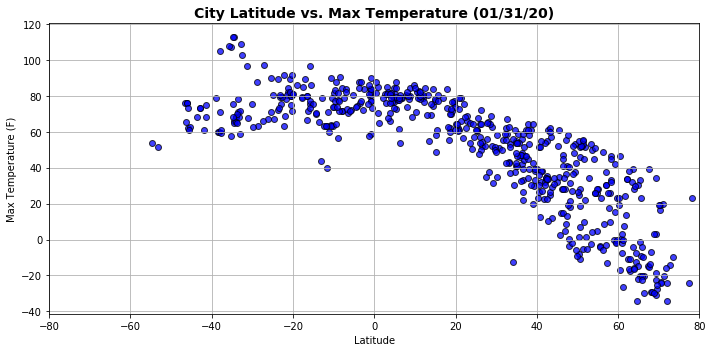

In [7]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Max Temp"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs. Max Temperature ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Max Temperature (F)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/MaxTemp_Lat.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

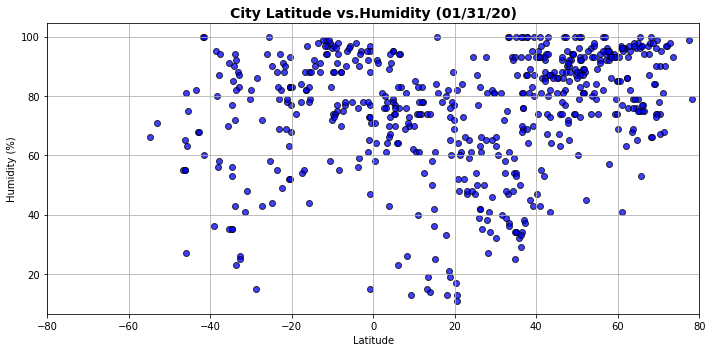

In [8]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Humidity"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs.Humidity ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Humidity (%)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/Humidity_Lat.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

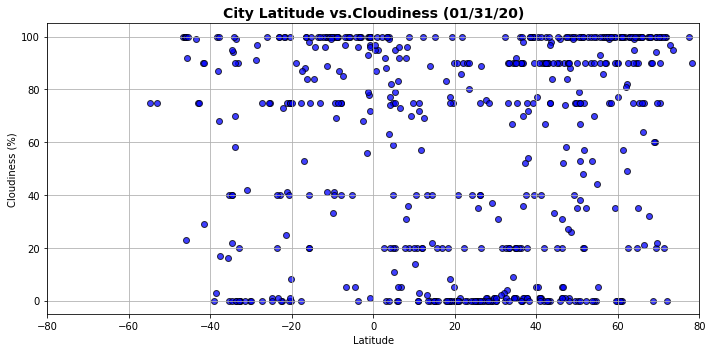

In [9]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Cloudiness"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs.Cloudiness ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Cloudiness (%)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/Cloudiness_Lat.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

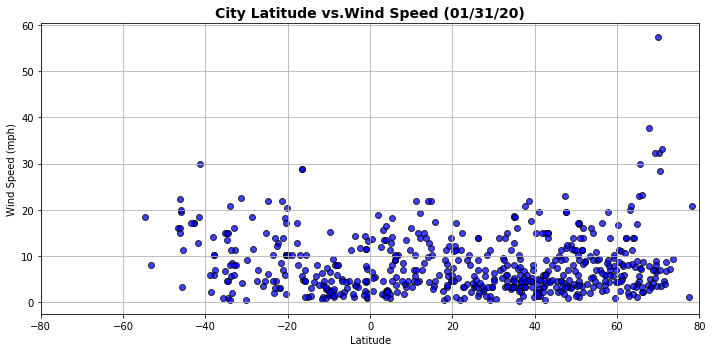

In [10]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Wind Speed"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs.Wind Speed ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Wind Speed (mph)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/WindSpeed_Lat.png")

# Show the Figure
plt.show()